In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=21ea06bf326c06ec727615316593992c787bc1b895c3925f716742919b1a8789
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("lab13").setMaster("local[*]")
sc = SparkContext(conf=conf)

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
df=spark.read.csv("Movies.csv")
df.show()

+----+------+--------------------+-------+--------------------+-----------------+--------------------+----------+------+-------------------+
| _c0|   _c1|                 _c2|    _c3|                 _c4|              _c5|                 _c6|       _c7|   _c8|                _c9|
+----+------+--------------------+-------+--------------------+-----------------+--------------------+----------+------+-------------------+
|Year|Length|               Title|  Genre|               Actor|          Actress|            Director|Popularity|Awards|              Image|
|1990|   111|Tie Me Up! Tie Me...| Comedy|     BanderasAntonio|    AbrilVictoria|      AlmodóvarPedro|        68|    No|   NicholasCage.png|
|1991|   113|          High Heels| Comedy|          BoséMiguel|    AbrilVictoria|      AlmodóvarPedro|        68|    No|   NicholasCage.png|
|1983|   104|        Dead ZoneThe| Horror|   WalkenChristopher|      AdamsBrooke|     CronenbergDavid|        79|    No|   NicholasCage.png|
|1979|   122|

**1. Find the title, year, and director of action films that won an award.**

In [ ]:
from pyspark.sql.functions import split, col
q1=df.select(df._c0,df._c2,df._c6,df._c8)
q1=q1.filter(q1._c8 == "Yes")
q1.show()

+----+--------------------+-------------------+---+
| _c0|                 _c2|                _c6|_c8|
+----+--------------------+-------------------+---+
|1982| Fanny and Alexander|      BergmanIngmar|Yes|
|1966|     A Man & a Woman|      LelouchClaude|Yes|
|1966|Un Hombre y una M...|      LelouchClaude|Yes|
|1985|   Official StoryThe|         PuenzoLuiz|Yes|
|1957|   Wild Strawberries|      BergmanIngmar|Yes|
|1962|Through a Glass D...|      BergmanIngmar|Yes|
|1972|    Cries & Whispers|      BergmanIngmar|Yes|
|1965|   Sound of MusicThe|         WiseRobert|Yes|
|1987|     Babette's Feast|        AxelGabriel|Yes|
|1974|Murder on the Ori...|        LumetSidney|Yes|
|1980|     Elephant ManThe|         LynchDavid|Yes|
|1982|E. T. The Extra-T...|    SpielbergSteven|Yes|
|1990|              Misery|          ReinerRob|Yes|
|1982|              Gandhi|AttenboroughRichard|Yes|
|1978|       Autumn Sonata|      BergmanIngmar|Yes|
|1944|            Gaslight|        CukorGeorge|Yes|
|1982|A Woma

**2. For each award-winning actor, find the movies he acted it. Print the names of the movies and the
director of the movie.**

In [ ]:
q2=df.select(df._c2,df._c4,df._c6,df._c8)
q2=q2.filter(q2._c8 == "Yes")
q2.show()

+--------------------+--------------------+-------------------+---+
|                 _c2|                 _c4|                _c6|_c8|
+--------------------+--------------------+-------------------+---+
| Fanny and Alexander|       AhlstedtBörje|      BergmanIngmar|Yes|
|     A Man & a Woman|TrintignantJean-L...|      LelouchClaude|Yes|
|Un Hombre y una M...|TrintignantJean-L...|      LelouchClaude|Yes|
|   Official StoryThe|       AlterioHector|         PuenzoLuiz|Yes|
|   Wild Strawberries|      SjöströmVictor|      BergmanIngmar|Yes|
|Through a Glass D...|   BjörnstrandGunnar|      BergmanIngmar|Yes|
|    Cries & Whispers|     JosephsonErland|      BergmanIngmar|Yes|
|   Sound of MusicThe|  PlummerChristopher|         WiseRobert|Yes|
|     Babette's Feast| LaFontJean-Philippe|        AxelGabriel|Yes|
|Murder on the Ori...|        BalsamMartin|        LumetSidney|Yes|
|     Elephant ManThe|      HopkinsAnthony|         LynchDavid|Yes|
|E. T. The Extra-T...|          WallaceDee|    S

**3. Find the top 10 most popular movies that did not win an award.**

In [ ]:
q3 = df.select(df._c2, df._c7, df._c8)
q3 = q3.filter(q3._c8 == "No")
q3 = q3.sort(q3._c7.desc()).show(10)

+--------------------+---+---+
|                 _c2|_c7|_c8|
+--------------------+---+---+
|        Tango & Cash|  9| No|
|  Back to the Future|  9| No|
|Masque of the Red...|  9| No|
|Eighty-Four Chari...|  9| No|
|        Judge Priest|  9| No|
|           Dead-Bang|  9| No|
|               Glitz|  9| No|
|            Morituri|  9| No|
|Naked Gun: From t...|  9| No|
|        Boxing Babes|  9| No|
+--------------------+---+---+
only showing top 10 rows



**4. Find the 10 least popular movies that were released before 1980.**

In [ ]:
q4 = df.select(df._c0, df._c2, df._c7)
q4 = q4.filter(q4._c0 < 1980)
q4 = q4.sort(q4._c7).show(10)

+----+------------------+----+
| _c0|               _c2| _c7|
+----+------------------+----+
|1953|   White Lightning|null|
|1927|      Drop KickThe|null|
|1923|      Desert Rider|null|
|1954| Bank on the Stars|null|
|1968|           Shalako|   0|
|1970|           Airport|   0|
|1930|     Anna Christie|   0|
|1976|Shout at the Devil|   0|
|1953| Tales of Tomorrow|   0|
|1958|        Indiscreet|   1|
+----+------------------+----+
only showing top 10 rows



**5. Sort the movie’s release before 1990 by the title.**

In [ ]:
q5 = df.select(df._c0, df._c2)
q5 = q5.filter(q5._c0 >= 1990)
q5 = q5.sort(q5._c0).show()

+----+--------------------+
| _c0|                 _c2|
+----+--------------------+
|1990|               Alice|
|1990|    Funny about Love|
|1990|           Snow Kill|
|1990|     Camille Claudel|
|1990|        Quick Change|
|1990|              Misery|
|1990|Court-Martial of ...|
|1990|Tie Me Up! Tie Me...|
|1990|       Wild at Heart|
|1990|Twenty Four Hours...|
|1990|Best of Candid Ca...|
|1990|           RookieTHe|
|1990|           NoviceThe|
|1990| End of InnocenceThe|
|1990|Wait Until Spring...|
|1990|            PartyThe|
|1990|            Meridian|
|1990|White HunterBlack...|
|1990|Bloodsucking Phar...|
|1990|Bonfire of the Va...|
+----+--------------------+
only showing top 20 rows



**6. Explore and preprocess the “wine” data set which was given you in previous lab, use spark
dataframes and analyse it. Find the outliers or noise in the data and find the correlation between
different features.**

+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-----------------+
|summary|           Alcohol|        Malic_Acid|               Ash|     Ash_Alcanity|         Magnesium|     Total_Phenols|        Flavanoids|Nonflavanoid_Phenols|   Proanthocyanins|  Color_Intensity|                Hue|             OD280|          Proline|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+-------------------+------------------+-----------------+
|  count|               178|               178|               178|              178|               178|               178|               178|                 178|               178|              178|                178|          

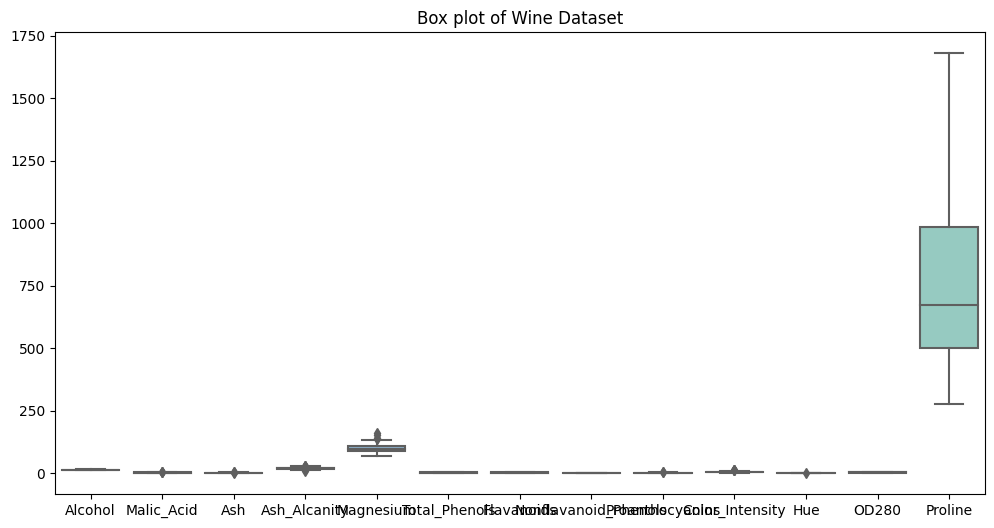

IndexError: ignored

In [ ]:
from pyspark.sql import SparkSession

# create a SparkSession
spark = SparkSession.builder.appName("Wine").getOrCreate()

# load the wine dataset as a DataFrame
wine_df = spark.read.csv("wine_dataset.csv", header=True, inferSchema=True)

# drop the "class" column
wine_df = wine_df.drop("class")

# show the summary statistics of each feature
wine_df.describe().show()

# visualize the dataset using a box plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=wine_df.toPandas(), palette="Set3", ax=ax)
plt.title("Box plot of Wine Dataset")
plt.show()

# remove the outliers or noise from the dataset
# we can use the IQR method to remove the outliers from the dataset
from pyspark.sql.functions import col, expr

# calculate the quartiles and IQR for each feature
quartiles = wine_df.approxQuantile(list(wine_df.columns), [0.25, 0.75], 0.05)
iqr_values = [float(quartiles[1][i] - quartiles[0][i]) for i in range(len(wine_df.columns))]

# apply the IQR method to remove the outliers from the dataset
outliers_removed_df = wine_df.select(*[(col(c) >= expr(str(q[0] - 1.5*iqr)) ) & (col(c) <= expr(str(q[1] + 1.5*iqr))) for i, (c, q, iqr) in enumerate(zip(list(wine_df.columns), quartiles, iqr_values))]).dropna()

# show the summary statistics of each feature after removing the outliers or noise
outliers_removed_df.describe().show()

# find the correlation between different features
correlation_matrix = outliers_removed_df.corr()
correlation_matrix.show()


**7. Implement K-means algorithm on Wine dataset by yourself using rdds.**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import ClusteringEvaluator

# create a SparkSession
spark = SparkSession.builder.appName("Clustering").getOrCreate()

# load the dataset as a DataFrame
dataset = spark.read.csv("wine_dataset.csv", header=True, inferSchema=True)

# select the features to be used for clustering and scale them using the StandardScaler
feature_cols = dataset.columns[1:]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
scaled_data = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True).fit(assembler.transform(dataset)).transform(assembler.transform(dataset)).select("scaled_features")

# split the dataset into training and testing sets
(training_data, testing_data) = scaled_data.randomSplit([0.7, 0.3])

# train the K-means clustering model on the training set
kmeans = KMeans(featuresCol="scaled_features", predictionCol="prediction", k=3, maxIter=20, seed=1)
kmeans_model = kmeans.fit(training_data)

# evaluate the K-means clustering model on the testing set using the Silhouette score
evaluator = ClusteringEvaluator(featuresCol="scaled_features", predictionCol="prediction")
silhouette_score = evaluator.evaluate(kmeans_model.transform(testing_data))
print("Silhouette score for K-means clustering:", silhouette_score)

# train the Bisecting K-means clustering model on the training set
bisecting_kmeans = BisectingKMeans(featuresCol="scaled_features", predictionCol="prediction", k=3, maxIter=20, seed=1)
bisecting_kmeans_model = bisecting_kmeans.fit(training_data)

# evaluate the Bisecting K-means clustering model on the testing set using the Silhouette score
silhouette_score = evaluator.evaluate(bisecting_kmeans_model.transform(testing_data))
print("Silhouette score for Bisecting K-means clustering:", silhouette_score)


Silhouette score for K-means clustering: 0.4691203782546633
Silhouette score for Bisecting K-means clustering: 0.43633591797073884
